

# Project: TMDB Movie Data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I love to watch movies so decided to investigate the tmdb-movies dataset.<br>
1: Which genere is most popular ?<br>
2: What are the deciding factor for movie to be able to make profit?<br>

In [44]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [45]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


From above output we can see that we have budget, revenue and budget_adj , revenue_adj columns. lets get rid of them and use one of them.

Now we will see information of each columns and see we have any null values .
If we have few null value compare to our data then we can remove those rows ,
if we have more number of rows null them we need to use other methods to replace missing values in rows.
example : we can replace missing value by mean.

In [46]:
df.shape

(10866, 21)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From above information we can come up with below result :<br>
1.Column like Homepage has large number of rows as null so removeing those rows can lead to hige data lose so we can remove column itself.<br>
2.genres and production_companies columns has few rows as null so we can cosider removing those rows.<br>
3..release_date type is object not datetime , so we need to convert it<br>


Unique values in columns 

In [48]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

1. we can see that release_year has less number of unique value becasue movies can have same release year
2. movies can have same director as well 

lets get some more information

In [49]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


1.we can see budget and revenue minimun value are 0 , that is not possible.
2.budget_adj and revenue_adj have weird values so we can drop them in next scetion



### Data Cleaning 

In this section we will perform below cleaning processes:<br>
1)convert release_date to datetime <br>
2)drop unneccesary columns such as imdb_id, budget, revenue, homepage, keywords, overview<br>
3)drop duplicates<br>
4)drop rows which dont have values for genre and production companies becasue this will be key component to do our analysys<br>
5)drop rows which have budget_adj and revenue_adj as 0<br>

In [50]:
##convert release_date to datetime 
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

In [51]:
##drop unneccesary columns such as imdb_id, budget, revenue, homepage, keywords, overview
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'director','tagline'], axis=1, inplace=True)

In [52]:
##drop duplicates
df.drop_duplicates(inplace=True)

In [53]:
##drop rows which dont have values for genre and production companies becasue this will be key component to do our analysys
df.dropna(inplace=True, subset=['genres', 'production_companies'])

In [54]:
##drop rows which have budget_adj and revenue_adj as 0
df.drop(df[(df.budget_adj == 0)].index, inplace=True)
df.drop(df[(df.revenue_adj == 0)].index, inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 13 columns):
id                      3808 non-null int64
popularity              3808 non-null float64
original_title          3808 non-null object
cast                    3806 non-null object
runtime                 3808 non-null int64
genres                  3808 non-null object
production_companies    3808 non-null object
release_date            3808 non-null datetime64[ns]
vote_count              3808 non-null int64
vote_average            3808 non-null float64
release_year            3808 non-null int64
budget_adj              3808 non-null float64
revenue_adj             3808 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 357.0+ KB


In [56]:
df.head()

,id,popularity,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [57]:
df.tail()

,id,popularity,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10822,396,0.670274,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,131,Drama,Chenault Productions,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,0.402730,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,128,Mystery|Thriller,Universal Pictures,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,0.395668,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,120,Action|Western,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,0.299911,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10848,2161,0.207257,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07


As we see from head and tail fucntion 
we can find some error in release date.
lets see for how many data this is occuring 


In [58]:
(df['release_date'].dt.year == df['release_year']).all()

False

In [59]:
## lets replace release date year wiht release year so we can have common year
update = pd.to_datetime({'year': df['release_year'], 'month': df['release_date'].dt.month, 'day': df['release_date'].dt.day})
(update.dt.year == df['release_year']).all()

True

In [60]:
## now we will replace our release date time column with this new update
df['release_date'] = update
df.head()

,id,popularity,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [61]:
df.tail()

,id,popularity,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10822,396,0.670274,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,131,Drama,Chenault Productions,1966-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,0.402730,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,128,Mystery|Thriller,Universal Pictures,1966-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,0.395668,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,120,Action|Western,Paramount Pictures|Laurel Productions,1966-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,0.299911,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,1966-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10848,2161,0.207257,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,1966-08-24,42,6.7,1966,3.436265e+07,8.061618e+07


<a id='eda'></a>
## Exploratory Data Analysis



## Create function to reduce redundancy

In [22]:
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 

### Which Genre are most Popular?

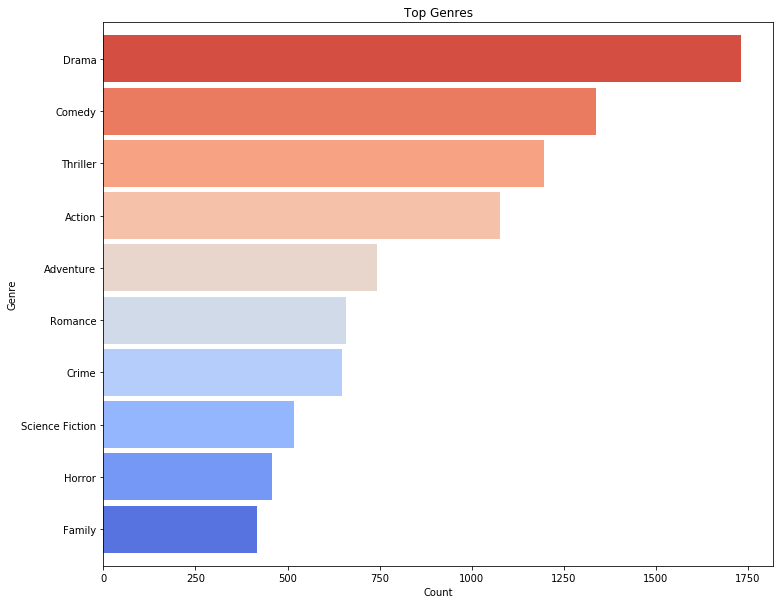

In [62]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

genrelist = df['genres'].str.split('|')
genres = []
#add all genre in list
for i in genrelist:
    genres.extend(i)
    
#now we will plot graph based on count of each genre

plt.subplots(figsize=(12,10))
pd.Series(genres).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
plt.title('Top Genres')
set_label('Count', 'Genre')
plt.show()


### Which type of movies are more profitable?

In [63]:
#lets get profit information from our dataset

df['profit'] = df['revenue_adj'] - df['budget_adj']
df['profit'].describe()

count    3.808000e+03
mean     9.392298e+07
std      1.949739e+08
min     -4.139124e+08
25%     -1.420694e+06
50%      2.836532e+07
75%      1.089595e+08
max      2.750137e+09
Name: profit, dtype: float64

From describe function what we can say is out of 100 movies 25 movies dont make profit


Lets see if more budget films can get more profit,
we will use scatter graph for this finding.

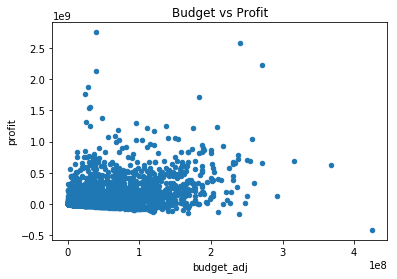

In [64]:
a =df.plot.scatter(x='budget_adj', y='profit', title='Budget vs Profit');


From above graph we cant say that when we have high budget we will have high profit or big loss.
the correlation between Budget and Profit is weak.

Lets use Release date vs profit to see what we can achive and explore.

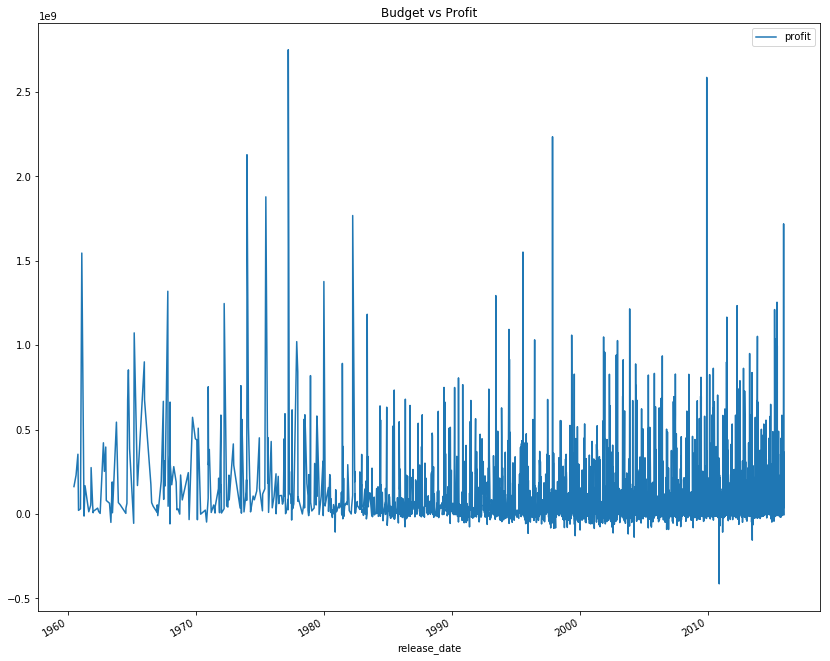

In [65]:
df.plot.line(x='release_date', y='profit', title='Budget vs Profit',figsize=(14,12));

As per my knowledge Titanic movie was realse on 1997 and Avatar was release on 2009 .
Both films did make huge profit that we can see in the graph.
but this is not showing any useful information.
We can expand this graph more and see in which time of year films make more Profit
So in finacial term we can use quarter to divide year in 4 part
Each quarter will contain 3 months.
January, February, and March (Q1)
April, May, and June (Q2)
July, August, and September (Q3)
October, November, and December (Q4)
we will use mean of Quater to simplify our data

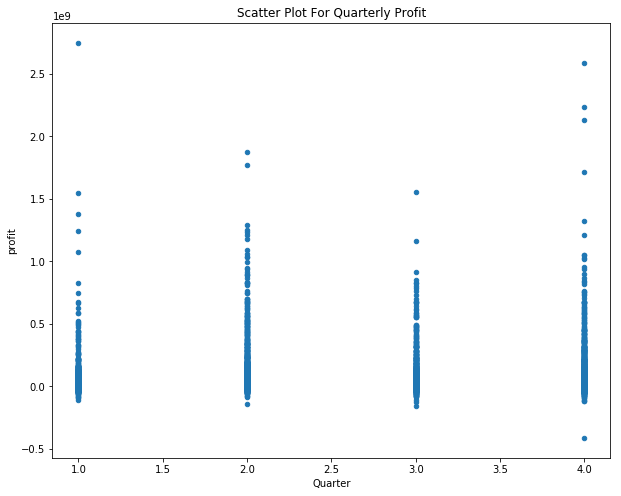

In [66]:
df['Quarter'] = pd.to_datetime(df.release_date).dt.quarter

df.plot(kind='scatter',x='Quarter',y='profit',figsize = (10,8),title='Scatter Plot For Quarterly Profit');

From above graph we can say that movies which are release in Q2 and Q4 have more profit compare to Q1 and Q3 release movies.

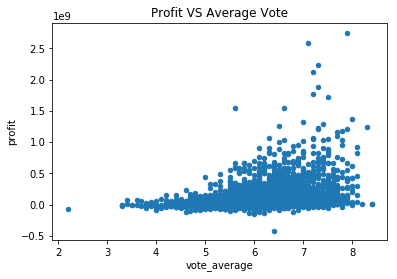

In [67]:
df.plot.scatter(x='vote_average', y='profit',title = 'Profit VS Average Vote');


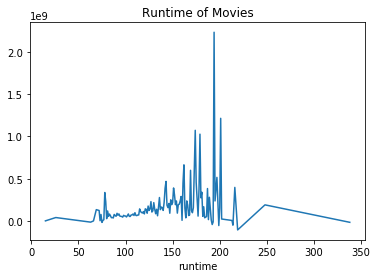

In [68]:
df.groupby('runtime').mean()['profit'].plot(title='Runtime of Movies');


## Conclusions

###Movie Gerne :<br>
Drama is Most popular gerne.<br>

###About Profite :<br>

1.It is not true that the higher the budget of the movie, the more profit we will get.<br>
2.We can see pattern in profit based on quarter <br>
3.we can see pattern in average vote. Higher the average vote higher the profit<br>
4.movies which has runtime around 200 have more profit.<br>

## Limitations
I see that there are several limitation in our data that might change our result for example the 0 value in the budget and revenue adjusted which should be further explored.There is huge variance in number of people who voted and the type of voters which are unknown.Some columns were heavily unbalanced for example duration of movie.All these limitation might have effect on our result.

###reference<br>
1.https://pandas.pydata.org/pandas-docs